<a href="https://colab.research.google.com/github/hikiofni/BACKTESTT/blob/master/EGLD_EMA_%2B_stoch_RSI_%2B_TRIX_1HOUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install python-binance

     |████████████████████████████████| 63 kB 992 kB/s 
     |████████████████████████████████| 214 kB 14.5 MB/s 
     |████████████████████████████████| 288 kB 30.2 MB/s 
     |████████████████████████████████| 103 kB 37.8 MB/s 
     |████████████████████████████████| 1.1 MB 36.8 MB/s 
     |████████████████████████████████| 271 kB 45.2 MB/s 
     |████████████████████████████████| 192 kB 59.9 MB/s 
     |████████████████████████████████| 160 kB 47.7 MB/s 


In [2]:
pip install ta

  Created wheel for ta: filename=ta-0.7.0-py3-none-any.whl size=28718 sha256=d2d9f5ee2dbc6c4f9d357f753a02838ad2a38c7b7b25a9080aaafa59cec7fbe7
  Stored in directory: /root/.cache/pip/wheels/5e/74/e0/72395003bd1d3c8f3f5860c2d180ff15699e47a2733d8ebd38
Successfully built ta


<h1>Import Dataset</h1>

In [3]:
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt
import numpy as np

client = Client()
pairName = "EGLDUSDT"


klinesT = client.get_historical_klines(pairName, Client.KLINE_INTERVAL_1HOUR, "5 july 2017")

df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])

del df['ignore']
del df['close_time']
del df['quote_av']
del df['trades']
del df['tb_base_av']
del df['tb_quote_av']

df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']
print(df)

                        open     high      low    close           volume
timestamp                                                               
2020-09-03 03:00:00   19.710   35.000   19.710   23.640  230806.88500000
2020-09-03 04:00:00   23.601   24.261   22.150   22.920   73034.90200000
2020-09-03 05:00:00   22.918   25.102   22.810   24.217   85861.99100000
2020-09-03 06:00:00   24.178   24.300   22.919   23.484   37018.33500000
2020-09-03 07:00:00   23.482   23.800   20.975   22.801   58391.89900000
...                      ...      ...      ...      ...              ...
2021-11-10 14:00:00  337.820  338.700  333.440  334.760   13489.75040000
2021-11-10 15:00:00  334.820  336.130  332.440  335.420    5870.93000000
2021-11-10 16:00:00  335.440  337.500  334.530  334.790    4672.16000000
2021-11-10 17:00:00  334.720  334.740  327.370  331.240   15925.09000000
2021-11-10 18:00:00  331.400  331.660  329.030  330.340    6617.42000000

[10390 rows x 5 columns]


<h1>Backtest Execution</h1>

Create Indicators

Make backtest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:


=======RESULTAT=========

Pair Symbol : EGLDUSDT 

Period : [2020-09-03 03:00:00] -> [2021-11-10 18:00:00]

Starting balance : 1000 $
Final balance : 95364.83 $

Performance vs US Dollar : 9436.48 %
Buy and Hold Performence : 1297.38 %
Performance vs Buy and Hold : 627.35 %

Number of negative trades :  26
Number of positive trades :  28
Trades win rate ratio : 51.85 %

Average Positive Trades :  24.36 %
Average Negative Trades :  -3.13 %

Best trade +145.54 %, the  2021-02-11 20:00:00
Worst trade -12.96 %, the  2021-06-08 03:00:00 

Worst drawBack -19.0 %

Total fee :  1190.66 $
PLOT


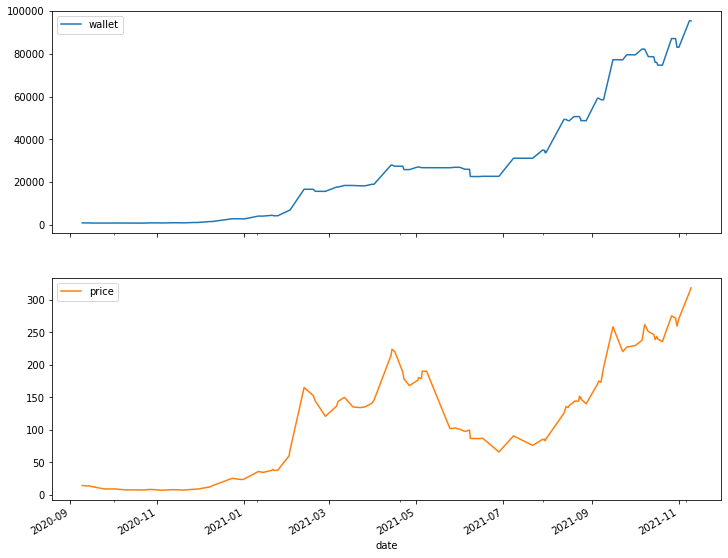

In [43]:
dfTest = df['2019-01-25':]

# dfTest['histo_macd']=ta.trend.macd_diff(dfTest['close'], 26, 12, 9)
dfTest['EMA28']=ta.trend.ema_indicator(dfTest['close'], 25)
dfTest['EMA48']=ta.trend.ema_indicator(dfTest['close'], 60)
trixLength = 8
trixSignal = 17
dfTest['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=df['close'], window=trixLength), window=trixLength), window=trixLength)
dfTest['TRIX_PCT'] = dfTest["TRIX"].pct_change()*100
dfTest['TRIX_SIGNAL'] = ta.trend.sma_indicator(dfTest['TRIX_PCT'],trixSignal)
dfTest['TRIX_HISTO'] = dfTest['TRIX_PCT'] - dfTest['TRIX_SIGNAL']
# dfTest['MACD']=ta.trend.macd(dfTest['close'], 26, 12, 9)
# dfTest['MACD_SIGNAL']=ta.trend.macd_signal(dfTest['close'], 26, 12, 9)
# dfTest['MACD_HISTO']= dfTest['MACD'] - dfTest['MACD_SIGNAL']
# dfTest['EMA8']=ta.trend.ema_indicator(dfTest['close'], 8)
# dfTest['EMA14']=ta.trend.ema_indicator(dfTest['close'], 14)
# dfTest['EMA50']=ta.trend.ema_indicator(dfTest['close'], 50)
dfTest['STOCH_RSI']=ta.momentum.stochrsi(dfTest['close'], window=15)
top = 0.88
bottom = 0.1
# dfTest['MEAN_STOCH_RSI'] = ta.trend.sma_indicator(dfTest['STOCH_RSI'], 3)
# dfTest['SIGNAL_MEAN_STOCH_RSI'] = ta.trend.sma_indicator(dfTest['MEAN_STOCH_RSI'], 3)
dfTest

dt = None
dt = pd.DataFrame(columns = ['date','position', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

usdt = 1000
initalWallet = usdt
coin = 0
wallet = 1000
lastAth = 0
lastIndex = df.first_valid_index()
fee = 0.0007

for index, row in dfTest.iterrows():
  #Buy
  if row['TRIX_HISTO'] > 0 and row['EMA28'] > row['EMA48'] and row['STOCH_RSI'] <= top and  usdt > 0:
    coin = usdt / row['close']
    frais = fee * coin
    coin = coin - frais
    usdt = 0
    wallet = coin * row['close']
    if wallet > lastAth:
      lastAth = wallet
    # print("Buy COIN at",df['close'][index],'$ the', index)
    myrow = {'date': index,'position': "Buy",'price': row['close'],'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)

  #Sell
  if row['TRIX_HISTO'] < 0 and row['EMA28'] < row['EMA48'] and row['STOCH_RSI'] >= bottom and coin > 0:
    usdt = coin * row['close']
    frais = fee * usdt
    usdt = usdt - frais
    coin = 0
    wallet = usdt
    if wallet > lastAth:
      lastAth = wallet
    # print("Sell COIN at",df['close'][index],'$ the', index)
    myrow = {'date': index,'position': "Sell",'price': row['close'],'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  lastIndex = index

#///////////////////////////////////////

print("\n=======RESULTAT=========\n")

print("Pair Symbol :",pairName,"\n")

print("Period : [" + str(dfTest.index[0]) + "] -> [" +str(dfTest.index[len(dfTest)-1]) + "]\n")
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'
totalGoodTrades = dt.groupby('tradeIs')['date'].nunique()['Good']
totalBadTrades = dt.groupby('tradeIs')['date'].nunique()['Bad']

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPorcentage = ((lastClose - iniClose)/iniClose) * 100
algoPorcentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPorcentage = ((algoPorcentage - holdPorcentage)/holdPorcentage) * 100
totalTrades = totalBadTrades + totalGoodTrades
winRateRatio = (totalGoodTrades/totalTrades) * 100


print("Starting balance : 1000 $")
print("Final balance :",round(wallet,2),"$\n")

print("Performance vs US Dollar :",round(algoPorcentage,2),"%")
print("Buy and Hold Performence :",round(holdPorcentage,2),"%")
print("Performance vs Buy and Hold :",round(vsHoldPorcentage,2),"%\n")

print("Number of negative trades : ",dt.groupby('tradeIs')['date'].nunique()['Bad'])
print("Number of positive trades : ",dt.groupby('tradeIs')['date'].nunique()['Good'],)
print("Trades win rate ratio :", round(winRateRatio, 2), "%\n")

print("Average Positive Trades : ",round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(),2),"%")
print("Average Negative Trades : ",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(),2),"%\n")
idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
print("Best trade +"+str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(),2)),"%, the ",dt['date'][idbest])
print("Worst trade",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(),2),"%, the ",dt['date'][idworst],"\n")

print("Worst drawBack", str(100*round(dt['drawBack'].min(),2)),"%\n")
print("Total fee : ",round(dt['frais'].sum(),2),"$")

dt[['wallet','price']].plot(subplots=True, figsize=(12,10))
print('PLOT')

<h1>Backtest Result</h1>